# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

# **(1) Importing the necessary libraries and overview of the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importing graphic utilities
import matplotlib.patheffects as path_effects
import matplotlib as mpl

# Importing pearson function
from scipy.stats import pearsonr

# **(2) Loading the data**

In [2]:
# Reading the file
df = pd.read_csv("auto-mpg.csv")

### **Data Overview**

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


>**Observations**:
>- There are 398 observations and 8 columns in the data.
>- All variables except horsepower and car name are of numeric data type.
>- The horsepower must be a numeric data type. We will explore this further.

# **(3) Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



### Checking the unique values in the 'car name' column

In [5]:
# Creating copy of the data so that we don't lose the original data
data = df.copy()

In [6]:
# How many unique car name are in the database
data["car name"].nunique()

305

>**Observations:**
>- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [7]:
# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


### Checking values in the horsepower column

In [8]:
# Checking if there are values other than digits in the column 'horsepower'
print(data.horsepower.nunique()) # Few values
data.horsepower.unique()

94


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
# Other way
print(data[~data.horsepower.str.isdigit()].horsepower.value_counts())

data[~data.horsepower.str.isdigit()].horsepower

?    6
Name: horsepower, dtype: int64


32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object

>**Observations**:
>- There are 6 observations where horsepower is ?. We can consider these values as missing values.
>- We can impute these missing values and change the data type of horsepower column.
>- First, we need to replace the ? value.

In [10]:
# Imputing data to overcome missing values
data.horsepower.replace('?', None, inplace=True)
data.horsepower.fillna(np.floor(data.horsepower.median()), inplace = True)

data['horsepower'] = data.horsepower.astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 20.3 KB


### **Summary Statistics**

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.296482,38.224809,46.0,76.000,93.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


>**Observations:**
> - There aree 398 records in the dataset.
> - There is no missing values after the imputation in the horsepower column.
> - The mpg, displacement and horsepower shows some kind of extreme values, further review of the data will be required.
> - The half of vehicles have a weight less than 2803.5
> - The year of the vehicles are from 1970 to 1982.
> - The model year and the cylinders are categorical variables.

### Let's check the distribution and outliers for each column in the data

In [13]:
# Global variable to use in plots.
suptitle_param = dict(color='darkslategray', weight='bold', fontsize='x-large')

def get_feature_hist_and_boxplot(feature, bins="auto", figsize=(6, 3)):
    """ Boxplot and histogram combined
    feature: pandas.series
    bins: number of bins (default "auto")
    figsize: size of fig (default (6, 3))
    """
    mean = feature.mean()
    median = np.median(feature)
    min_v = feature.min()
    max_v = feature.max()
    
    sns.set(font_scale=.75) 
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, color='red',
                showmeans=True, 
                meanprops={"marker":"o", 
                           "markerfacecolor":"goldenrod", 
                           "markeredgecolor":"silver", 
                           "markersize":"10"})
    
    text = ax_box.annotate("Mean {:,.4f}".format(mean), fontsize='small',
                           xy=(mean, -0.15), color='g', weight='bold', ha='center')
    text.set_path_effects([path_effects.Stroke(linewidth=3, 
                                               foreground='black'), path_effects.Normal()])
    ax_box.set_ylabel('BoxPlot\n')
    ax_box.set_xlabel('')
    
    # For histogram
    sns.histplot(x=feature, kde=False, bins=bins, ax=ax_hist)
    ax_hist.axvline(mean, color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(median, color='black', linestyle='-') # Add median to the histogram
    
    min_max_pos = 0.05 * ax_hist.get_ylim()[1]
    text = ax_hist.annotate("Median {:,.4f}".format(median), fontsize='small',
                            xy=(median, ax_hist.get_ylim()[1]/2), 
                            color='w', weight='bold', ha='center')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='k'), path_effects.Normal()])
    text = ax_hist.annotate("Min {:,.4f}".format(min_v), fontsize='small',
                            xy=(min_v, min_max_pos), 
                            color='w', weight='bold', ha='left')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='k'), path_effects.Normal()])
    text = ax_hist.annotate("Max {:,.4f}".format(max_v), fontsize='small',
                            xy=(max_v, min_max_pos), 
                            color='w', weight='bold', ha='right')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='k'), path_effects.Normal()])
    
    ax_hist.set_ylabel('HistPlot')
    ax_hist.set_xlabel('')
    
    # Calculating the skewness
    # If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. 
    # If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), 
    # the data are slightly skewed. 
    # If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), 
    # the data are extremely skewed.
    skewness = feature.skew()
    if skewness<-1: skewness_str = 'Extremely Negative Skewed'
    elif skewness<-0.5: skewness_str = 'Negative Skewed'
    elif skewness==0: skewness_str = 'Simetrical Distributed'
    elif skewness<=0.5: skewness_str = 'Nearly Simmetrical'
    elif skewness<=1: skewness_str = 'Positive Skewed'
    elif skewness>1: skewness_str = 'Extremely Positive Skewed'
    f.suptitle(f'{feature.name.upper()}\nSkew: {skewness:0.4f} ({skewness_str})', **suptitle_param)
    plt.subplots_adjust(hspace=1, top=0.9)
    plt.tight_layout()

    plt.show()
    plt.style.use('default')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 20.3 KB


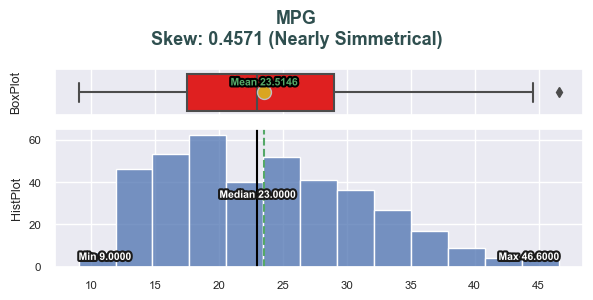

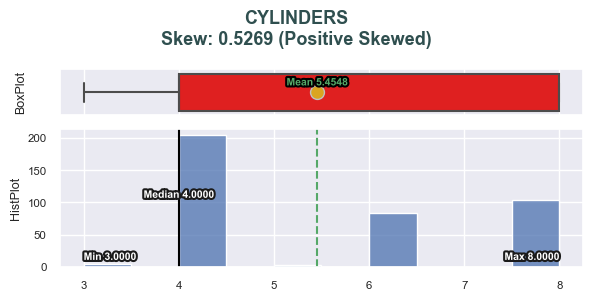

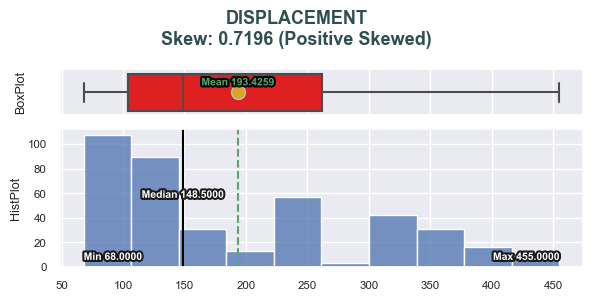

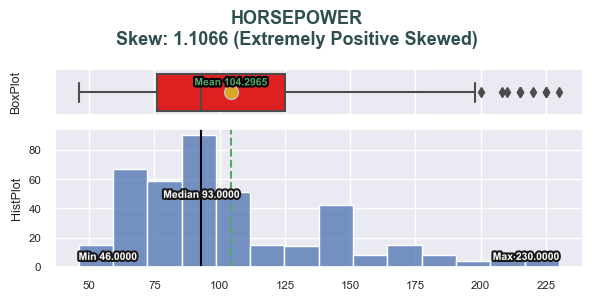

In [15]:
for col in data.columns[:4]:
    get_feature_hist_and_boxplot(data[col])

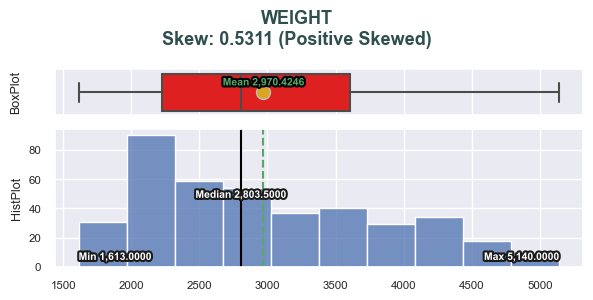

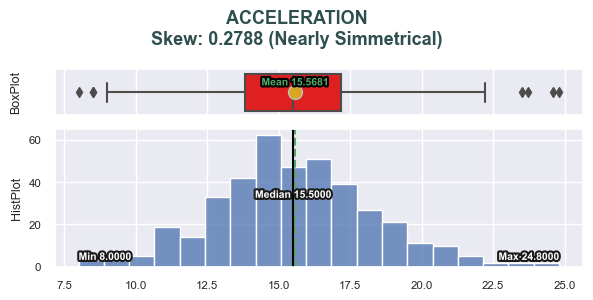

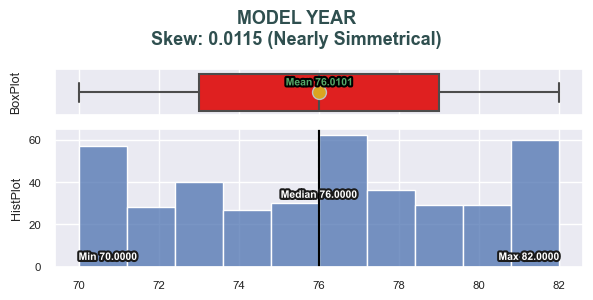

In [16]:
for col in data.columns[4:]:
    get_feature_hist_and_boxplot(data[col])

>**Observations:**
> - The MPG seems to show a normal distribution.
> - Horsepower shows many outliers on the right side.
> - Acceleration shows outliers in both side.
> - Model year has some pikes on 71, 77, 81, besides this values the rest looks like uniformaly distributed.

### Checking the correlation

In [17]:
def get_df_correlation(df):
    """Plot a heatmap of the correlation between numerical variables in df.
    df: dataframe.
    """
    corr = df.corr(numeric_only=True)

    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    sns.set(font_scale=0.75)
    plt.figure(figsize = (6, 4))
    sns.heatmap(corr, annot=True, mask=mask, cmap='vlag')
    plt.title('Correlation between numerical variables', **suptitle_param)
    plt.show()
    plt.style.use('default')

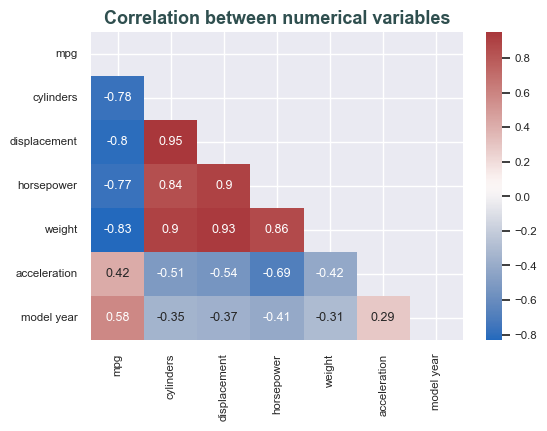

In [18]:
get_df_correlation(data)

>**Observations:**
> - The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight.
> - horsepower and acceleration are negatively correlated.
> - The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
> - model year is positively correlated with mpg.

### **Scaling the data**

There are many methods to scale the data:

|Preprocessing Type	|Scikit-learn Function	|Observations |Pros	|Cons|
|:--|:--|:--|:--|:--|
|Scale	|MinMaxScaler | Preserves the shape of the original distribution. Doesn't reduce the importance of outliers. Least disruptive to the information in the original data. Default range for MinMaxScaler is 0 to 1. |Easy to implement and works fast. Alternative of StandardScaler if zero mean and unit variance should be avoided.|Sensitive to outliers. <br>Compressing the data set in a small range ([0, 1]) might result in loss of significant information.|
|Standardize 	|RobustScaler	|Outliers have less influence than with MinMaxScaler. Range is larger than MinMaxScaler or StandardScaler |Handles outliers and skewness.	|Does not take into account mean and median.|
|Standardize	|StandardScaler	|Results in a distribution with a standard deviation equal to 1 (and variance equal to 1). If you have outliers in your feature (column), normalizing your data will scale most of the data to a small interval. . |Easy to implement and works fast. <br>Applies regularization.	|Assumes the data set follows a normal distribution (Gaussian) which may not be the case.<br>Has scalability issues especially with large volumes of data.<br>Sensitive to outliers.|
|Normalize|Normalizer|Normalizes each sample observation (row), not the feature (column)!|

**Documentation**
- [Scale, Standardize, or Normalize with Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)
- [Normalization vs Standardization, which one is better](https://towardsdatascience.com/normalization-vs-standardization-which-one-is-better-f29e043a57eb)
- [Scale, Standardize or Normalize with sklearn](https://docs.google.com/spreadsheets/d/1woVi7wq13628HJ-tN6ApaRGVZ85OdmHsDBKLAf5ylaQ/edit#gid=0)


**Real World Use Cases for Feature Scaling**

There are several use cases and reasons to conduct feature scaling with real world data. Let’s explore a few of them!
- Gradient Descent Optimization
- Distance-Based Algorithms
- Principal Component Analysis (PCA)
- Regularization Techniques
- Neural Networks
- Image Processing
- Natural Language Processing (NLP)

In [19]:
def data_distribution(df, title, shareaxis=True):
    """Plot the distribution of the data in the current dataframe df
    """
    df.hist(figsize=(10,5), sharex=shareaxis, sharey=shareaxis)
    plt.suptitle(f'Data Distribution - {title}')
    plt.tight_layout()
    plt.show()

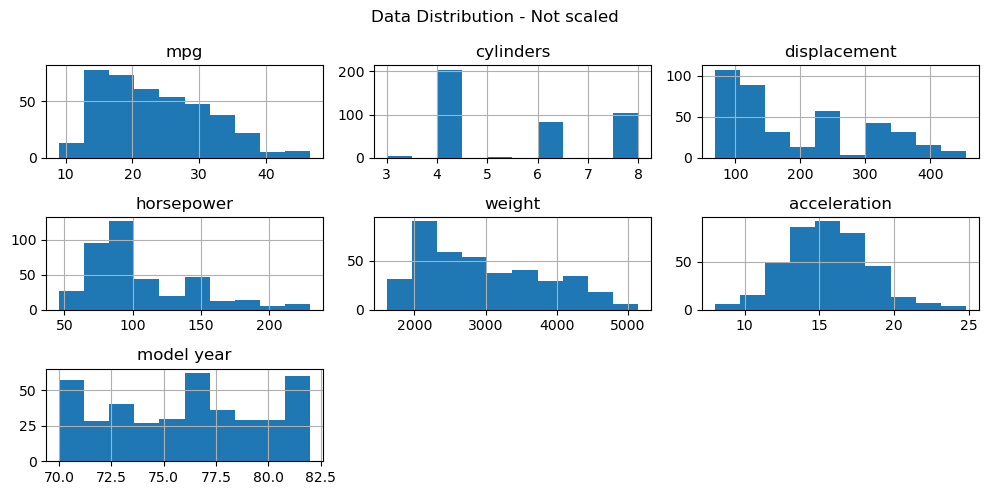

In [20]:
# Current Data distribution
data_distribution(data, 'Not scaled', shareaxis=False)

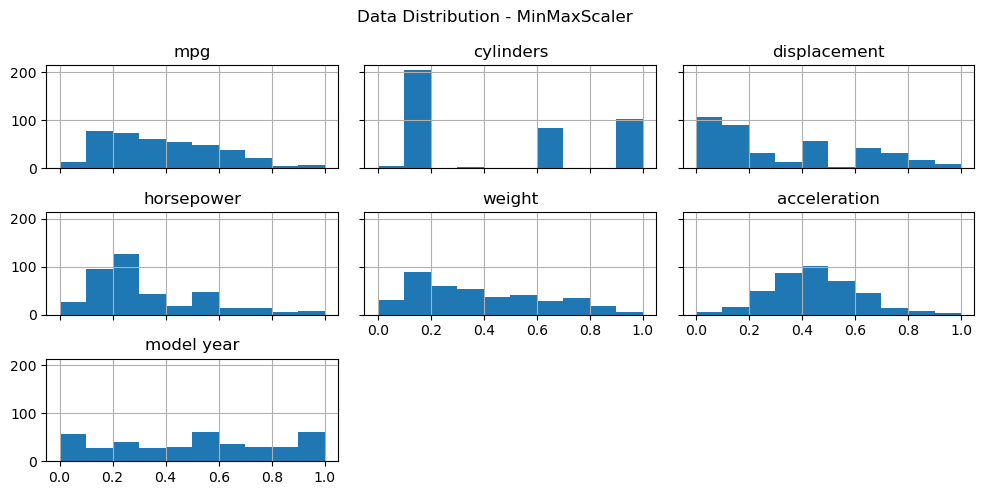

In [21]:
# Scaling the data with MinMaxScaler
minmax = MinMaxScaler()
data_scaled = pd.DataFrame(minmax.fit_transform(data), columns=data.columns)

data_distribution(data_scaled, title='MinMaxScaler')

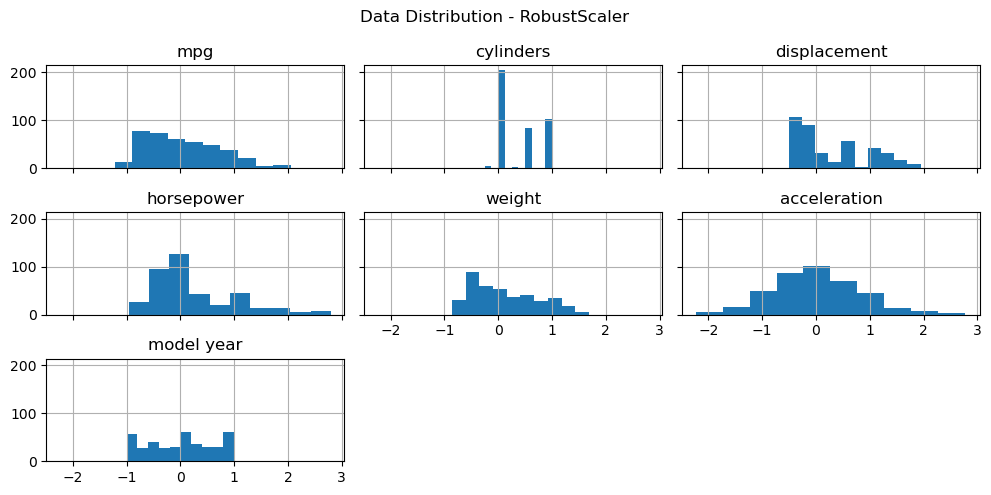

In [22]:
# Scaling the data with RobustScaler
robust = RobustScaler()
data_scaled = pd.DataFrame(robust.fit_transform(data), columns=data.columns)

data_distribution(data_scaled, title='RobustScaler')

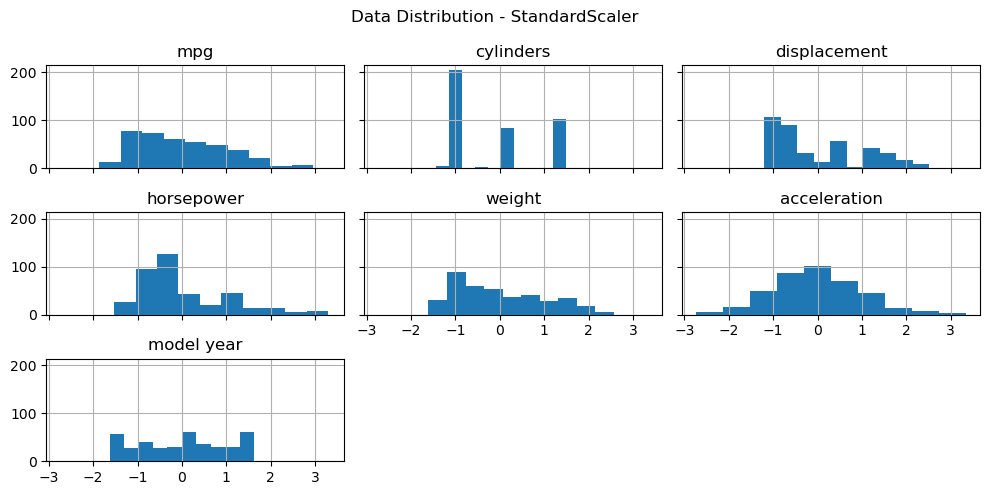

In [23]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_distribution(data_scaled, title='StandardScaler')

In [24]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,7.141133e-17,1.001259,-1.859374,-0.770491,-0.065919,0.702705,2.957335
cylinders,398.0,-3.570567e-17,1.001259,-1.444949,-0.856321,-0.856321,1.498191,1.498191
displacement,398.0,-1.785283e-17,1.001259,-1.204411,-0.856318,-0.431404,0.658488,2.511784
horsepower,398.0,0.000000e+00,1.001259,-1.527015,-0.741197,-0.295899,0.542307,3.292671
weight,398.0,-1.606755e-16,1.001259,-1.604943,-0.882827,-0.197362,0.753834,2.565185
acceleration,398.0,-2.677925e-16,1.001259,-2.747814,-0.632879,-0.024722,0.583435,3.351912
model year,398.0,-1.642461e-15,1.001259,-1.627426,-0.815074,-0.002721,0.809631,1.621983


## **Principal Component Analysis**

Applying the PCA algorithm with number of components equal to the total number of columns in the data

In [25]:
# Defining the number of principal components to generate 
n = len(data_scaled.columns)

# Finding principal components for the data
# Apply the PCA algorithm with random_state = 1
pca = PCA(n_components=n) # Complete the code 

# Fit and transform the pca function on scaled data
data_pca = pd.DataFrame(pca.fit_transform(data_scaled)) # Complete the code    

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_
exp_var

array([0.71478725, 0.1236542 , 0.10414147, 0.02671953, 0.01777253,
       0.0079034 , 0.00502162])

In [26]:
# Coefficient for each pca
pca.components_

array([[-0.39773207,  0.41648035,  0.42970663,  0.42233176,  0.41421767,
        -0.28482866, -0.22942922],
       [-0.21141114, -0.19163341, -0.17744456, -0.0902646 , -0.22197644,
         0.02409166, -0.91054585],
       [-0.25659532,  0.14078028,  0.1036476 , -0.1680733 ,  0.27966427,
         0.89264036, -0.01814892],
       [ 0.74911494,  0.48302207,  0.29344479, -0.03424889, -0.11312027,
         0.1280113 , -0.29841341],
       [ 0.33160876, -0.48526172, -0.06184784,  0.7257957 ,  0.24476171,
         0.23721847, -0.08815467],
       [-0.22836635,  0.3417283 , -0.14612417,  0.50325378, -0.7012755 ,
         0.21466487,  0.13632904],
       [-0.08935669, -0.42945801,  0.81353275, -0.06342551, -0.36938633,
         0.05239199,  0.05031585]])

In [27]:
# transformed data according to the PCA features
data_pca

,0,1,2,3,4,5,6
0,2.661618,0.918548,-0.558383,0.739872,-0.549504,-0.089610,-0.118540
1,3.523360,0.789797,-0.670616,0.493228,-0.025452,0.203515,0.101514
2,2.998370,0.861617,-0.982069,0.715542,-0.281616,0.137041,-0.055159
3,2.937620,0.949171,-0.607154,0.531043,-0.273001,0.295622,-0.121301
4,2.930750,0.931821,-1.078848,0.558486,-0.544011,0.007175,-0.167280
...,...,...,...,...,...,...,...
393,-1.420876,-1.225259,-0.286500,-0.671682,0.055038,-0.187607,0.101907
394,-4.094572,-1.280063,1.960237,1.375628,0.740515,0.175907,0.087331
395,-1.547152,-1.252499,-1.907098,-0.323862,-0.255379,-0.254561,0.149033
396,-2.022845,-1.132167,0.609279,-0.464291,0.186954,0.089557,0.074980


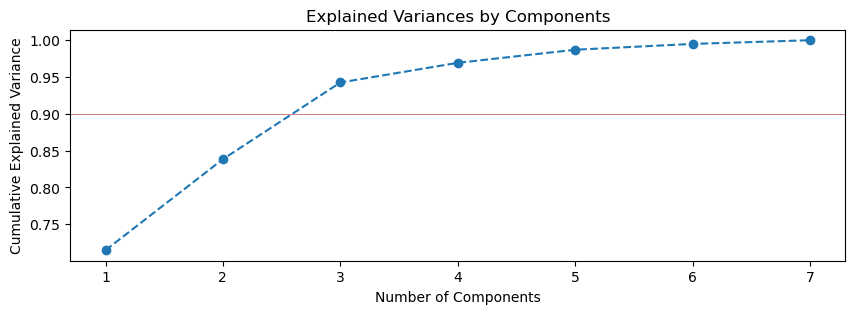

In [28]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 3))
plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.axhline(0.9, c='r', lw=0.5)
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [29]:
# Finding the least number of components that can explain more than 90% variance
print("Number of Principal Components that explain at least 90% variance:", 
      np.sum(exp_var.cumsum()<0.9) + 1)

Number of Principal Components that explain at least 90% variance: 3


**Observations:**
- We have reduced the number of features through PCA to 3 principal components, which explain approximately 90% of the original variance.
- Each principal component is a linear combination of the original features.

#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [30]:
data_pca_coef = pd.DataFrame(np.round(pca.components_[:3,:], 2), 
                             index = ['PCA1', 'PCA2', 'PCA3'], 
                             columns = data_scaled.columns)

color_data = lambda x: 'background: pink' if x <= -0.40 else 'background: skyblue' if x >= 0.40 else None
data_pca_coef.T.style.applymap(color_data)

,PCA1,PCA2,PCA3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:**
- The first principal component, PC1, holds about the 71% of the information, the PC2 holds around 12% and PC3, aproximately 10%. These 3 components holds around the 93% of the information.
- The first principal component (PC1) is seems to be correlated with five of the original features. PC1 increases with increasing cylinders, displacement, horsepower, and weight, and decrease when increase mpg. This suggests that these five criteria vary together. This component can be viewed as a measure for the potential in mpg, cylinders, displacement, horsepower, and weight matters. It seems to capture vehicles with biggest capabilities in those features mentioned.
- The second principal component (PC2) decreases with only one of the values, model year. This component can be viewed as a measure of how recently/old is the model of the vehicle.
- The third principal component (PC3) increases with increasing acceleration. This suggests that places with high accelaration capabilities.

#### **Visualize the data in 2 dimensions using the first two principal components**



In [31]:
def scatterplot_pc1_pc2(pca_df, hue=None, palette="YlOrBr", title=''):
    """Scatterplot of the 2 first pca component in a dataframe pca_df.
    """
    if hue is None:
        print(hue)
        palette=None
    plt.figure(figsize=(8, 3))
    sns.scatterplot(x=data_pca[0], y=data_pca[1], hue=hue, 
                    palette=palette, edgecolor='gray', alpha=0.9)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f'First 2 principal components in the data {title}')
    
    if palette: plt.legend()
    plt.tight_layout()
    plt.show()

None


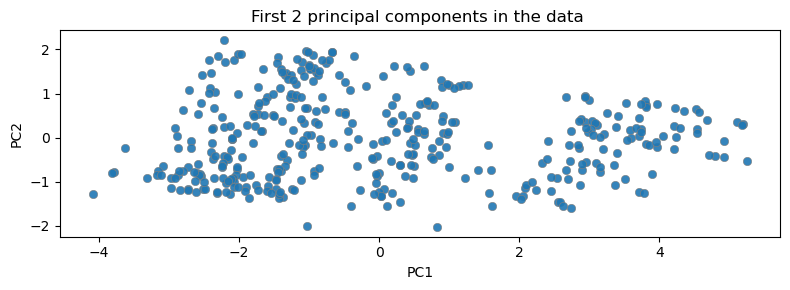

In [32]:
scatterplot_pc1_pc2(data_pca)

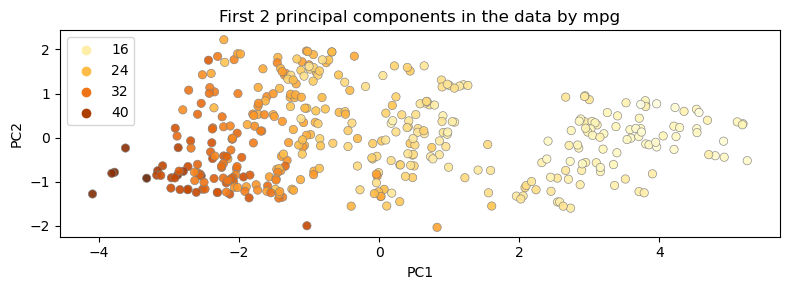

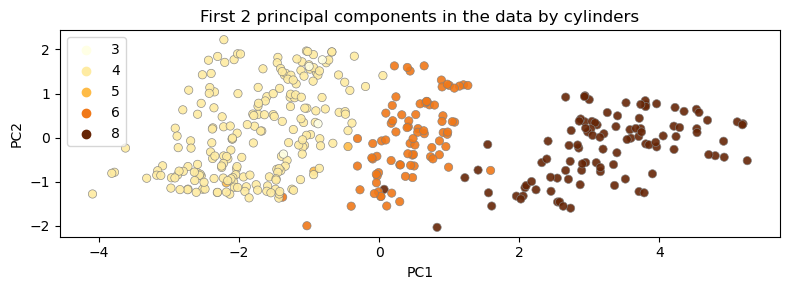

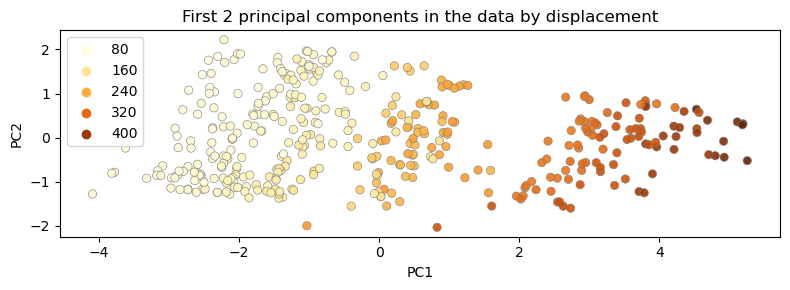

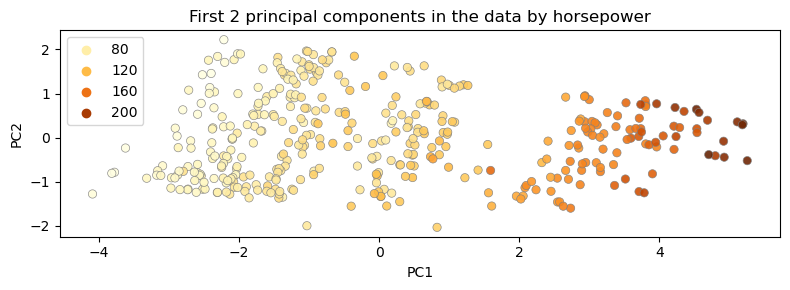

In [33]:
for col in data.columns[:4]:
    scatterplot_pc1_pc2(data_pca, hue=data[col], title=f'by {col}')

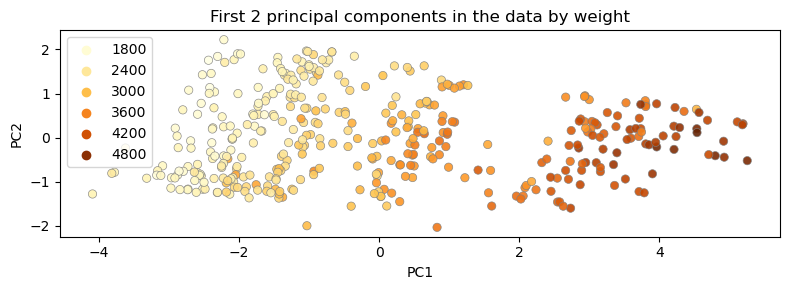

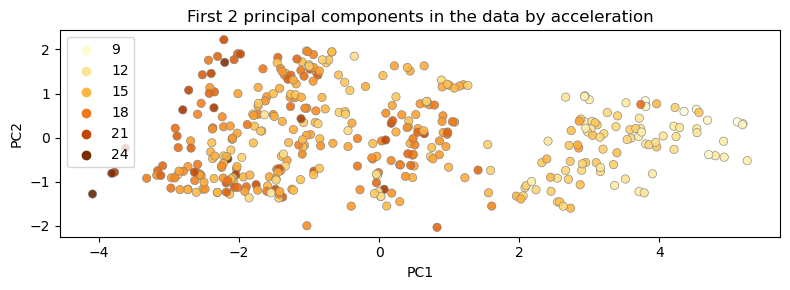

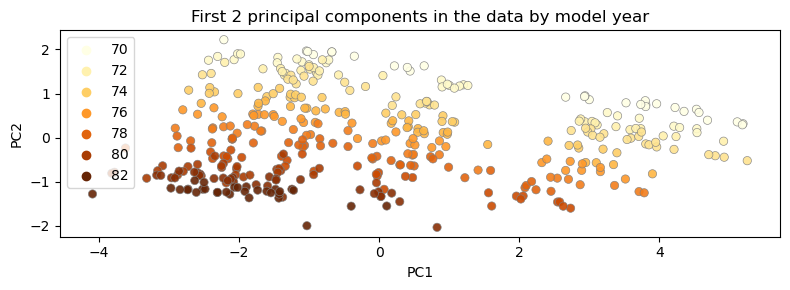

In [34]:
for col in data.columns[4:]:
    scatterplot_pc1_pc2(data_pca, hue=data[col], title=f'by {col}')

**Observations:**
- Each principal component is a linear combination of the original features. 
- The magnitude of the weights multiplied with each of the original features that comprise a principal component, is one way to look at the importance of each of the original features.
- For example, we observe that the PC1, holds the greatest value for cylinders, displacement, horsepower and weight, and if we look at those plot, we can see how representative those features are for the data itself.

## **t-SNE**

In [35]:
# Apply the t-SNE algorithm with random_state = 1
tsne = TSNE(n_components=2, random_state = 1)
            
# Fit and transform t-SNE function on the scaled data
data_tsne = tsne.fit_transform(data_scaled) 

# Converting the embeddings to a dataframe
data_tsne = pd.DataFrame(data_tsne, columns = ["Component_1", "Component_2"])

In [36]:
def plot_tsne_2(tsne_df, hue=None, title='', legend=False):
    """Plot of the first 2 components in the result getting after applying t-SNE algorithm
    """
    # Scatter plot for two components
    plt.figure(figsize=(8, 3))
    sns.scatterplot(x = 'Component_1', y = 'Component_2', hue=hue, data=data_tsne, legend=legend)
    plt.title(f'Applying T-SNE Algorithm {title}')
    plt.show()    

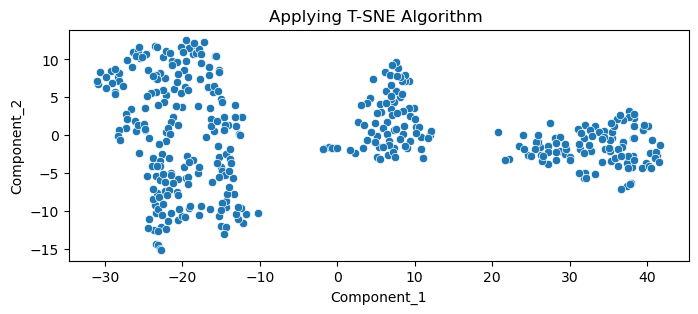

In [37]:
plot_tsne_2(data_tsne)

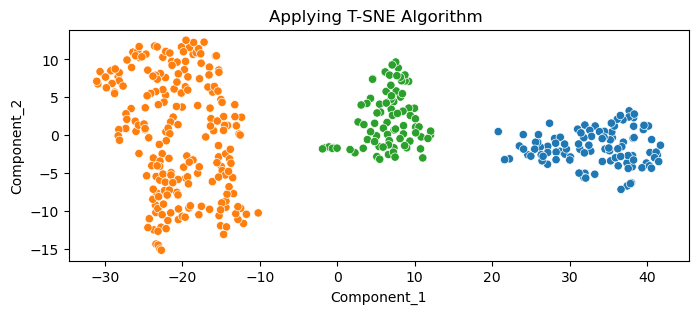

In [38]:
plot_tsne_2(data_tsne, 
            hue=data_tsne['Component_1'].apply(lambda x: 'Group 1' if x<-9.9 else 'Group 3' if x>19.9 else 'Group2'))

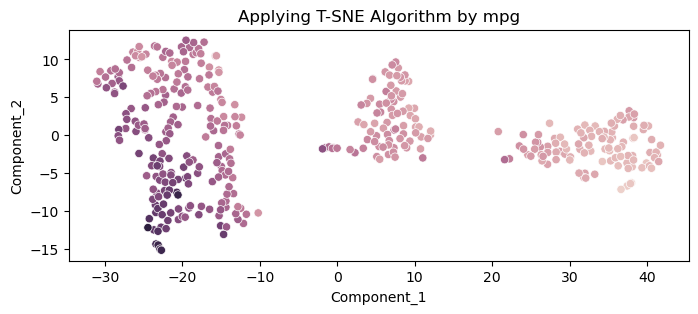

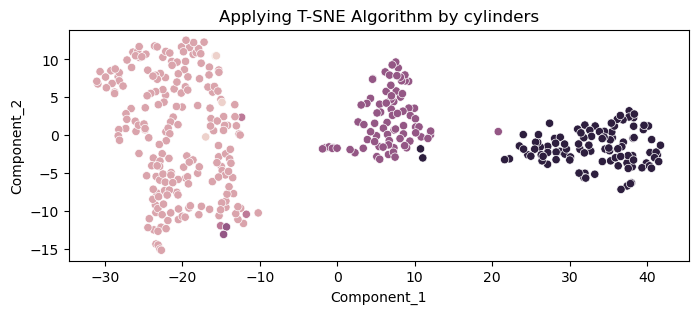

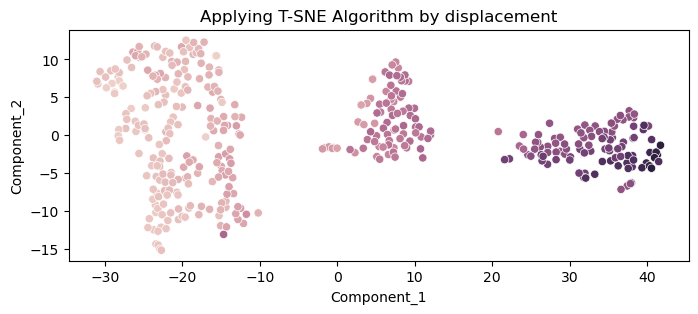

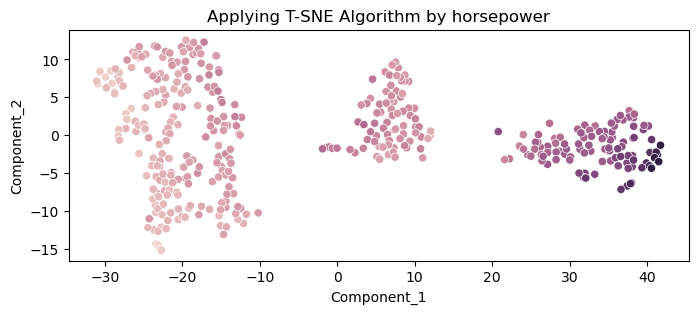

In [39]:
for col in data.columns[:4]:
    plot_tsne_2(data_tsne, hue=data[col], title=f'by {col}')

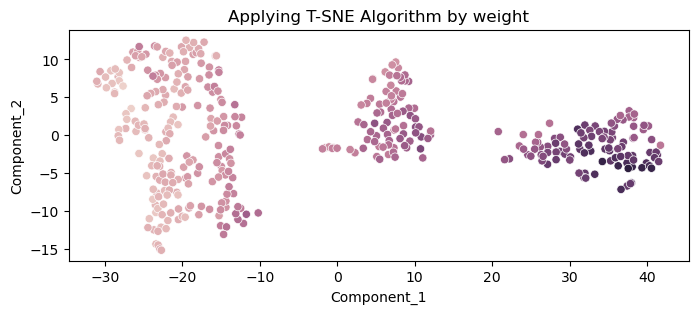

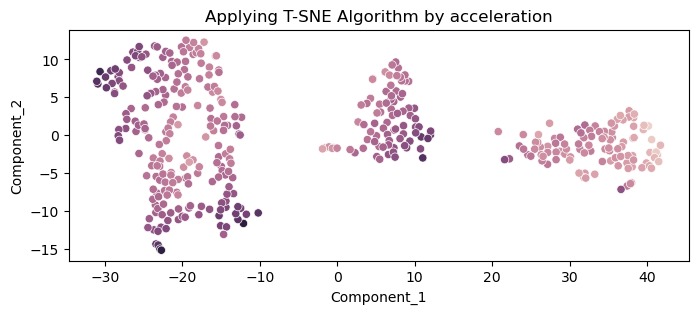

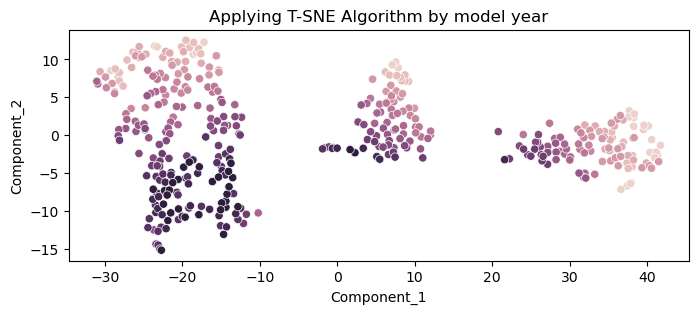

In [40]:
for col in data.columns[4:]:
    plot_tsne_2(data_tsne, hue=data[col], title=f'by {col}')

**Observations:**
- We can clearly see **3 groups in the data**.
- It seems like cylinders explain a lot this clustering.

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

In [41]:
# Let's **label these 3 groups** using the values of the Component_1 and Component_2 axes. 
data_scaled_tsne = data_scaled.copy()
grouping_tsne = lambda x: 'Group 1' if x<-9.9 else 'Group 3' if x>19.9 else 'Group2'
data_scaled_tsne['groups'] = data_tsne['Component_1'].apply(grouping_tsne)

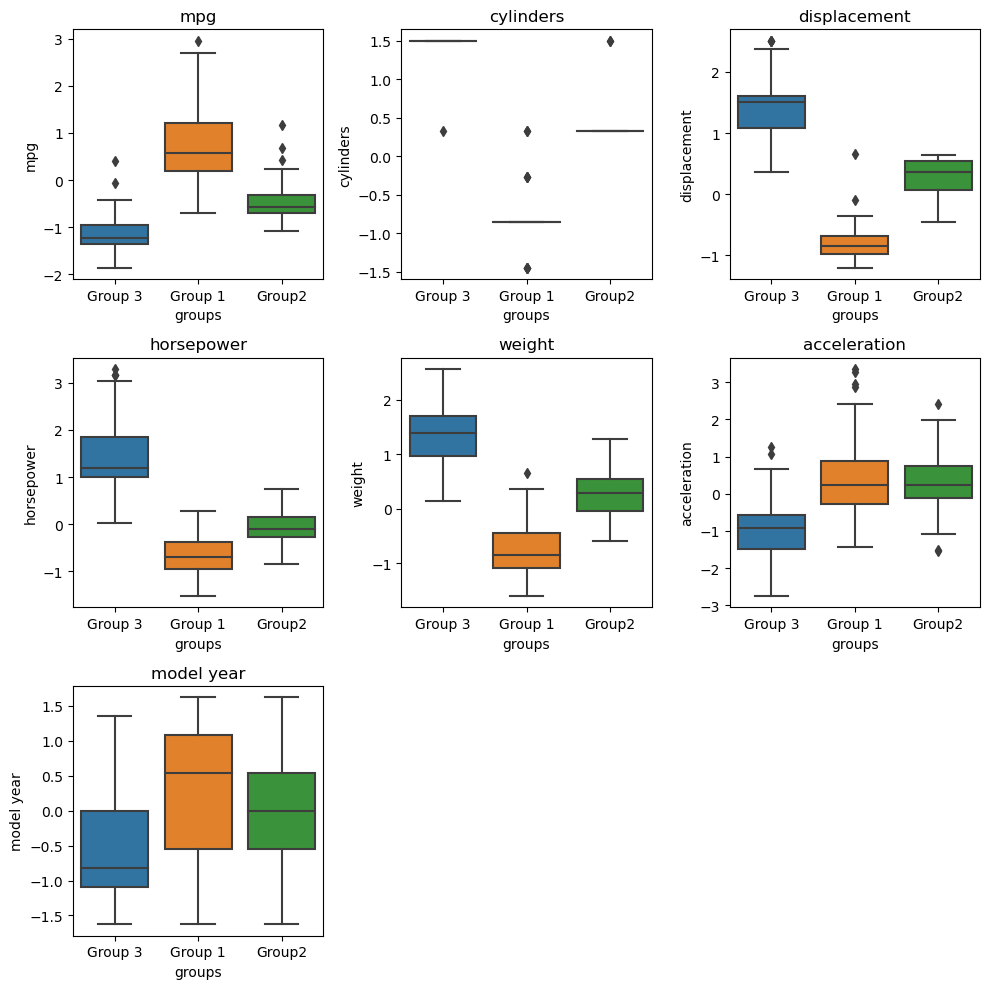

In [42]:
plt.figure(figsize = (10, 10))
for i, col in enumerate(data_scaled_tsne.columns[:-1]):
    plt.subplot(3, 3, i + 1)    
    sns.boxplot(y=data_scaled_tsne[col], x=data_scaled_tsne['groups'])
    plt.tight_layout()
    plt.title(col)
plt.show()

**Observations:**
- There are three groups in the data. Each group has a different set of characteristics.
- **Group 1** represents the vehicles with the highest mpg, lowest cylinders, displacement, and horsepower. It groups also lowest weight vehicles.
- **Group 2** represents the vehicles with the medium capabilities in mpg, cylinders, displacement and horsepower.
- **Group 3** holds the oldest model year and weightest vehicles.

## **Actionable Insights and Recommendations**

**Conclusion and Recommendations**:

We analyzed a dataset of 398 vehicles. From business perspective, we need to group this information in order to set different strategies accordingly to each group.
We have concluded that:
- We were able to reduce to 3 pca components, holding the at least 90% of the features, this reductions looks to help us to cluster the data in 3 different groups.
- We have tryied with the t-SNE algorith, observing with clarity that the information can be clustered in 3 groups.

Our recommendations to business:
- Continue with a clustering algorith to segment the information in 3 groups.

--------------------